In [54]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [55]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/Q200-p09/r2sc007-009pq/'

In [56]:
data = np.load(loc_P04+'P10.npy')

In [57]:
cropped_data = []
for k in data:
    cropped_data.append(k[170:385, 70:390])

In [58]:
cropped_data[0].shape

(215, 320)

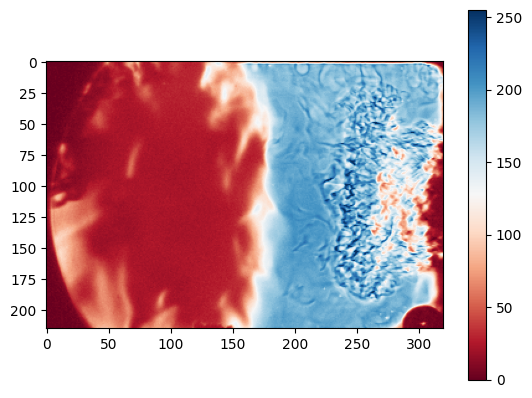

In [59]:
peg = plt.imshow(cropped_data[200], cmap='RdBu')
plt.colorbar(peg)

In [60]:
cropped_data[0].shape

(215, 320)

In [61]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(cropped_data[i], (9, 9), 9))
patches = np.array(patches)

In [62]:
patches.shape

(3046, 23, 35, 9, 9)

In [63]:
%who

FuncAnimation	 HTML	 anime	 arrange	 cropped_data	 data	 fft	 fft_filter_1000	 fft_plots	 
fft_ravel	 fft_sig_mean	 fft_sig_median	 fftfreq	 freq_pre	 frequencies	 i	 j	 k	 
loc_P04	 matplotlib	 mean	 mean_adj	 mean_all	 median	 n	 neg	 np	 
patches	 patchify	 peg	 plt	 sampling_rate	 ten_val	 thresh	 x_data	 x_data_fil	 
x_data_sort	 y_data	 y_data_fil	 y_data_sort	 


In [64]:
mean = np.zeros(patches.shape[:3])
median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [65]:
mean.shape

(3046, 23, 35)

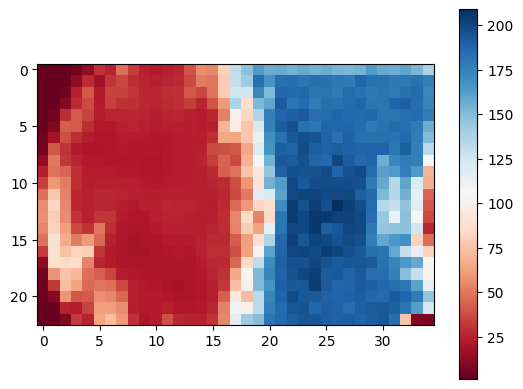

In [66]:
neg = plt.imshow(np.array(mean[100]), cmap='RdBu')
plt.colorbar(neg)

In [67]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

97.4881893928855


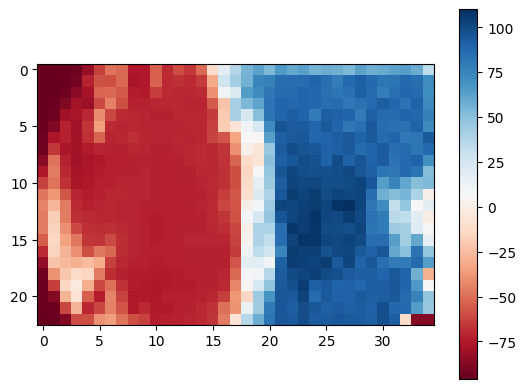

In [68]:
neg = plt.imshow(np.array(mean_adj[10]), cmap='RdBu')
plt.colorbar(neg)

In [69]:
from scipy.fft import fft, fftfreq
fft_sig_mean = np.zeros_like(mean).astype(np.complex64)
fft_sig_median = np.zeros_like(median).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig_mean[:, i, j] = fft(mean_adj[:, i, j])
            # fft_sig_median[:, i, j] = fft(median[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])

In [70]:
fft_sig_mean.shape

(3046, 23, 35)

In [71]:
n = fft_sig_mean.shape[0]  # Number of data points
sampling_rate = 2.7 * 1000 # Adjust this if your data is sampled differently
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

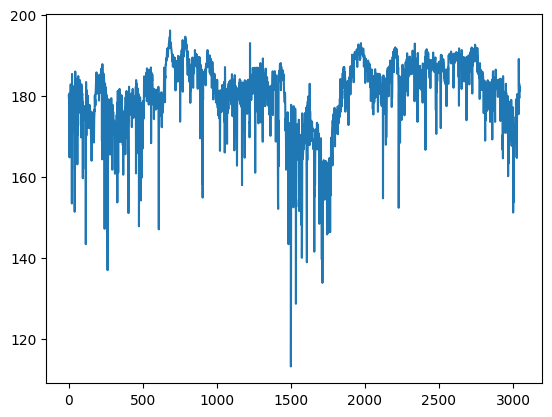

In [72]:
plt.plot(mean[: ,21,20])
# plt.xlim([0,1000])

In [73]:
frequencies.shape

(3046,)

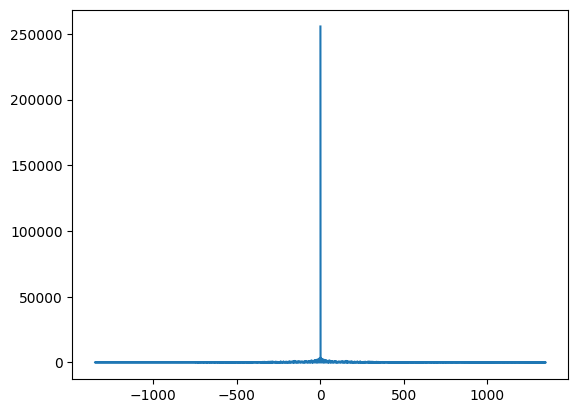

In [74]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,21,32]))
# plt.xlim([0,sampling_rate/2])

In [75]:
np.absolute(fft_sig_mean[: ,21,31]).shape

(3046,)

In [76]:
# np.absolute(fft_filter_1000[100:int(frequencies.shape[0]/2)]).shape

(0.0, 1350.0)

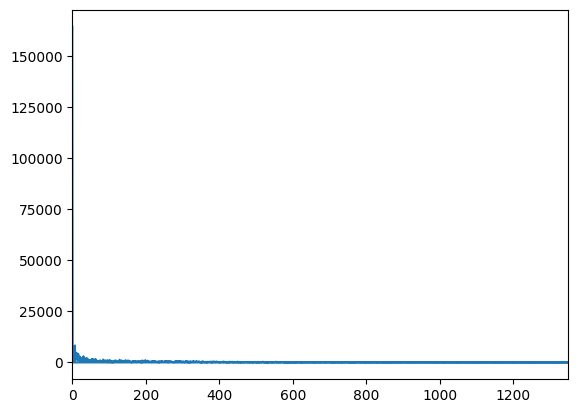

In [77]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,21,33]))
plt.xlim([0,sampling_rate/2])

(0.0, 1350.0)

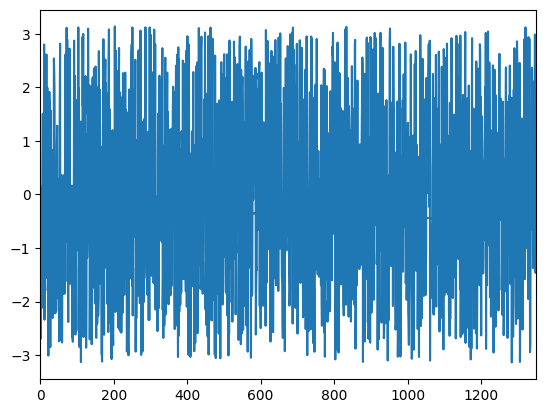

In [78]:
plt.plot(frequencies,np.angle(fft_sig_mean[:,21,33]))
plt.xlim([0,sampling_rate/2])

In [79]:
fft_ravel = np.reshape(fft_sig_mean, [np.array(cropped_data).shape[0], fft_sig_mean.shape[1]*fft_sig_mean.shape[2]])

In [80]:
abs(fft_ravel).max()

320147.97

### scalegram

In [81]:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
 
def anime(x, sig):
    fig, ax = plt.subplots(1, 1)
    # fig.set_size_inches(5,5)
    
    def animate(i):
        ax.clear()
        # Get the point from the points list at index i
        point = abs(sig[:,i])
        # Plot that point using the x and y coordinates
        ax.plot(x, point, 
                label='original',)
        ax.set_title('Pixel = {0:4d} and its FFT plot'.format(i))
        # Set the x and y axis to display a fixed rangeFrame
        ax.set_xlabel("Freq")
        ax.set_ylabel("abs(FFT)")
        ax.set_xlim([0, sampling_rate/2])
        ax.set_ylim([0, 5000])
        # ax.set_ylim([0, 1])
    ani = FuncAnimation(fig, animate, frames=sig.shape[1], interval=500, repeat=True)
    plt.close()
    display(HTML(ani.to_jshtml()))

In [82]:
fft_filter_1000 = np.zeros_like(fft_ravel)

for i in range(fft_ravel.shape[1]):
      for k in range(fft_ravel.shape[0]):
        if (abs(fft_ravel[k][i]<1000)):
            fft_filter_1000[k][i] = 0
        else:
            fft_filter_1000[k][i] = fft_ravel[k][i]

In [83]:
fft_filter_1000.shape

(3046, 805)

In [84]:
# anime(frequencies, fft_filter_1000)

In [85]:
# anime(frequencies, fft_ravel)

In [86]:
# plt.plot(frequencies[abs(fft_filter_1000[:, 2689]))

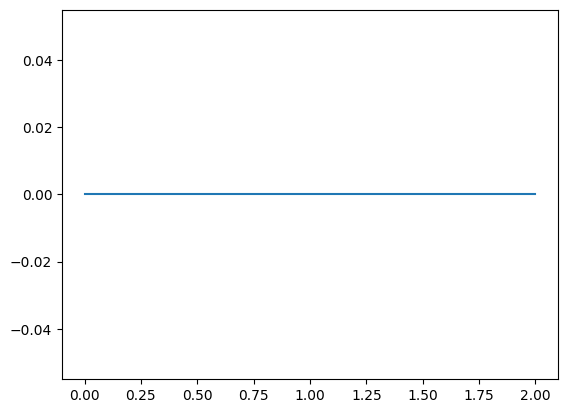

In [87]:
plt.plot(abs(fft_filter_1000[:, 44])[606:609])

In [88]:
#To save the FFT plots

def fft_plots(loc, name, sig):
    for i in range(sig.shape[1]):
        plt.plot(frequencies, abs(sig[:, i]))
        plt.title('Pixel = {0:4d} and its FFT plot'.format(i))
    # Set the x and y axis to display a fixed rangeFrame
        plt.xlabel("Freq")
        plt.ylabel("abs(FFT)")
        plt.xlim([0, sampling_rate/2])
        plt.ylim([0, 5000])
        exec(f'plt.savefig(loc+name+str({i}))')
        plt.show()

In [89]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/1000_filter/'
# name = 'pixel_FFT_1000_'
# fft_plots(loc,name, fft_filter_1000)

In [90]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/No_filter/'
# name = 'Pixel_FFT_noFilter_'
# fft_plots(loc,name, fft_ravel)

In [91]:
# from matplotlib.animation import FFMpegWriter
# # Save the animation as an animated GIF
# f = 'FFT_demonstration.mp4'
# writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(f, writer=writer)

In [92]:
fft_filter_1000[0:int(frequencies.shape[0]/2)].shape

(1523, 805)

In [93]:
freq_pre = np.zeros_like(fft_filter_1000, dtype=np.float32)
for i in range(fft_filter_1000.shape[0]):
    for j in range(fft_filter_1000.shape[1]):
        if fft_filter_1000[i][j] == 0:
            freq_pre[i][j] = 0
        else:
            freq_pre[i][j] = frequencies[i]

In [94]:
freq_pre.shape

(3046, 805)

In [95]:
# Creating a tensor of values for bar graph plotting
def ten_val(x_data):
    x_data_ten = []
    for i in range(x_data.shape[0]):
        k = []
        for j in range(x_data.shape[1]):
            if x_data[i][j] != 0:
                k.append(x_data[i][j])
        x_data_ten.append(k)
    return x_data_ten

In [96]:
# Preparing data for the 3D plotting 

x_data = freq_pre[0:int(freq_pre.shape[0]/2)].astype(np.int32)
y_data = np.absolute(fft_filter_1000[0:int(freq_pre.shape[0]/2),:]).astype(np.int32)

print(x_data.shape, y_data.shape)

(1523, 805) (1523, 805)


In [97]:
# freq_pre[:freq_pre.shape[0]/2].shape

In [98]:
for i in range(x_data.shape[0]):
    for j in range(x_data.shape[1]):
        if x_data[i][j] == 0:
            y_data[i][j] = 0

In [99]:
def arrange(x, y):
    x_data_sort = np.zeros_like(x)
    y_data_sort = np.zeros_like(y)
    for i in range(x.shape[1]):
        idx = np.argsort(y[:,i])
        x_data_sort[:, i] = x[:, i][idx]
        y_data_sort[:, i] = y[:, i][idx]
    return(x_data_sort, y_data_sort)

In [100]:
x_data_sort, y_data_sort = arrange(x_data, y_data)

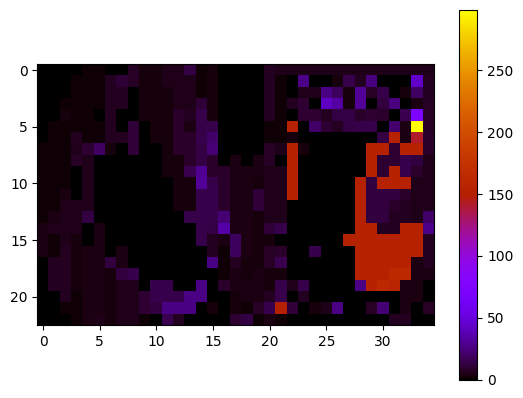

In [101]:
peg = plt.imshow(x_data_sort[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)
# plt.imsave(peg)

In [102]:
def thresh(x, y, the1, the2):
    arr1 = np.zeros_like(x)
    arr2 = np.zeros_like(y)
    arr1 = np.where(x>the1, x, 0)
    arr1 = np.where(arr1>the2, 0, arr1)
    arr2 = np.where(arr1>1, 1, 0)
    arr2 = arr2*y
    return(arr1, arr2)

In [103]:
x_data_fil, y_data_fil = thresh(x_data_sort, y_data_sort, 100, 130)

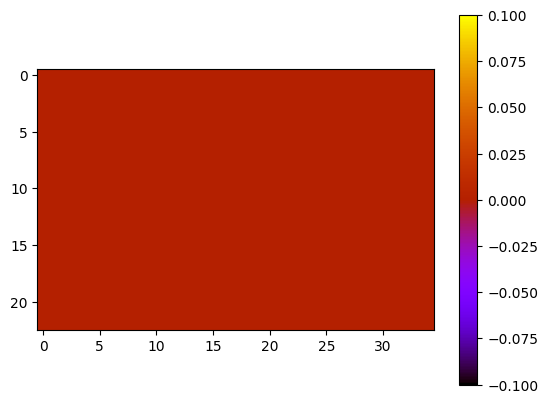

In [104]:
peg = plt.imshow(x_data_fil[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

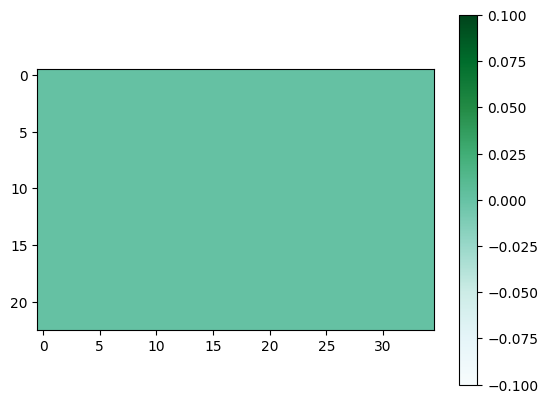

In [105]:
peg = plt.imshow(y_data_fil[-1, :].reshape(fft_sig_mean.shape[1:]), cmap="BuGn")
plt.colorbar(peg)

In [107]:
y_data_fil[-1, :].max()

0

In [108]:
def indi_fe(x, y):
    a = []
    b = []
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] != 0:
                a.append(x[i][j])
                b.append(y[i][j])
    a = np.array(a)
    b = np.array(b)
    return a, b

In [109]:
a, b = indi_fe(x_data_fil, y_data_fil)

In [110]:
import pandas as pd

a_idx = np.argsort(b)

a_sort = a[a_idx]
b_sort = b[a_idx]

<BarContainer object of 253 artists>

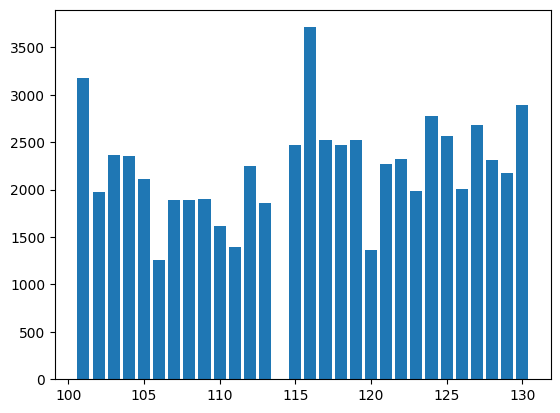

In [111]:
plt.bar(a, b)

In [112]:
df = pd.DataFrame(a_sort, b_sort)

df

,0
1011,116
1014,109
1022,109
1026,116
1033,112
...,...
2779,124
2896,130
2899,101
3178,101


(array([209.,   0.,   0.,  83.,   0.,   0.,  64.,   0.,   0.,   0.,  67.,
          0.,   0.,  60.,   0.,   0.,  70.,   0.,   0.,   0.,  22.,   0.,
          0.,  24.,   0.,   0.,  14.,   0.,   0.,   0.,  22.,   0.,   0.,
         13.,   0.,   0.,   9.,   0.,   0.,   0.,  13.,   0.,   0.,   4.,
          0.,   0.,   6.,   0.,   0.,   0.,  32.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   2.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,  10.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1., 

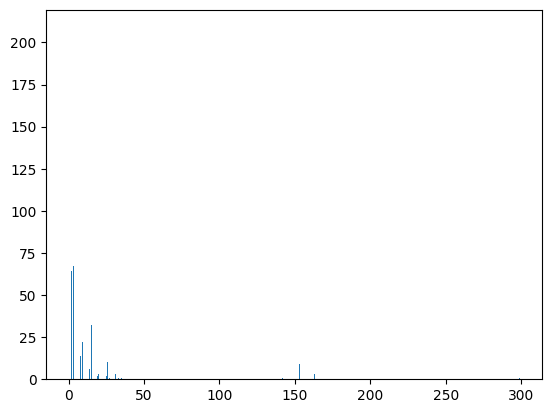

In [113]:
# plt.hist(x_data_sort[-1, :].reshape(fft_sig_mean.shape[1:]), )
plt.hist(x_data_sort[-1, :], bins=1000)
# plt.xlim(xmin=100, xmax=1200)
# plt.ylim(ymin=0, ymax=5)

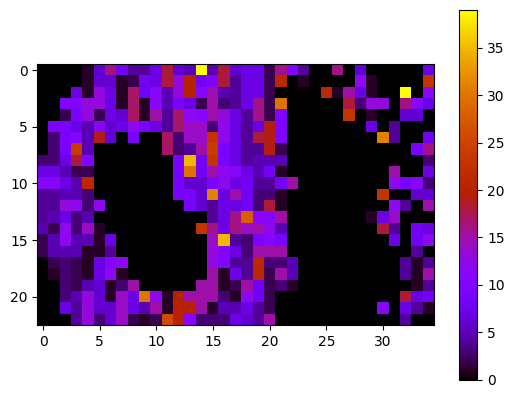

In [ ]:
peg = plt.imshow(x_data_sort[-2, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

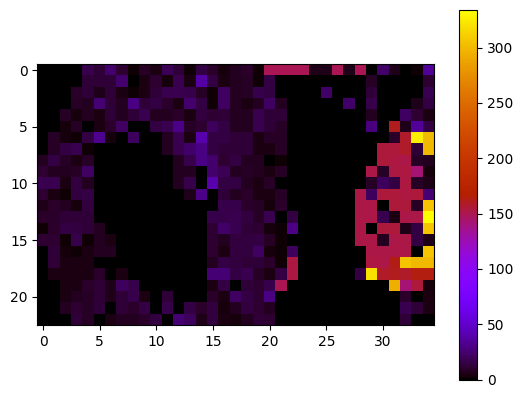

In [ ]:
peg = plt.imshow(x_data_sort[-3, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

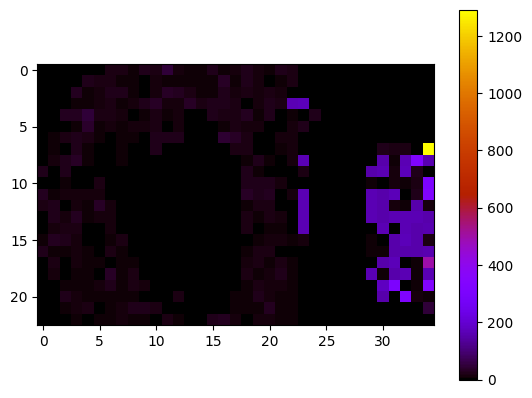

In [ ]:
peg = plt.imshow(x_data_sort[-4, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

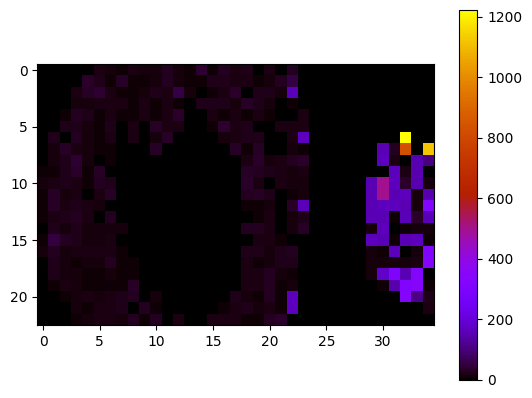

In [ ]:
peg = plt.imshow(x_data_sort[-5, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

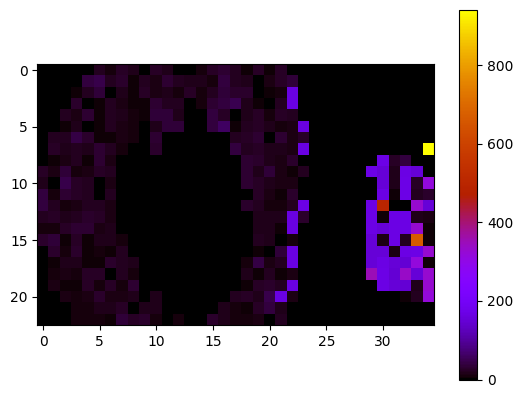

In [ ]:
peg = plt.imshow(x_data_sort[-6, :].reshape(fft_sig_mean.shape[1:]), cmap="gnuplot")
plt.colorbar(peg)

In [ ]:
# np.unique(x_data_con_sort[455])

In [ ]:
# y_data_con_sort.shape

In [ ]:
y_data.max()

32995.258